In [3]:
import sys
sys.path.insert(0, "/home/abuyalo/figanos/src")

import numpy as np
import xscen as xs
import xarray as xr
import cartopy.crs as ccrs
from xscen.config import CONFIG
import figanos.matplotlib as fg
import matplotlib.pyplot as plt
from matplotlib import colors

fg.utils.set_mpl_style('ouranos')

# Load configuration
xs.load_config(
    "../paths_obs.yml", "../config_obs.yml", verbose=(__name__ == "__main__"), reset=True
)

In [4]:
pcat = xs.ProjectCatalog(CONFIG["paths"]["project_catalog"])
pcat_df = pcat.df

In [5]:
def gen_title(rec_ds, obs_ds, horizon):
    rec_inst = rec_ds.attrs["cat:institution"]
    rec_source = rec_ds.attrs["cat:source"]
    obs_inst = obs_ds.attrs["cat:institution"]
    obs_source = obs_ds.attrs["cat:source"]
    
    return f"{obs_inst}'s {obs_source} vs {rec_inst}'s {rec_source}\nHorizon: {horizon}"

def plot_climatology_maps():
    pcat_df_clim = pcat_df[pcat_df["processing_level"] == "climatology"]
    variable_groups = pcat_df_clim["variable"].unique()

    variables = set(item for group in variable_groups for item in group)

    for clim_var in variables:
        print(f"Processing variable: {clim_var}")

        dt_obs = pcat.search(
            processing_level="climatology", variable=clim_var, source="AHCCD"
        ).to_dataset()

        dts_rec = pcat.search(
            processing_level="climatology", variable=clim_var, type="reconstruction"
        ).to_dataset_dict()

        dt_obs = dt_obs.expand_dims(dummy=("rec_ds", dts_rec.keys()))

        for rec_id, dt_rec in dts_rec.items():
            common_horizons = set(dt_rec.horizon.values).intersection(dt_obs.horizon.values)
            if not common_horizons:
                print(f"Skipping {clim_var}: no matching horizons.")
                continue

            for horizon in common_horizons:
                rec_var = dt_rec[clim_var].sel(horizon=horizon)
                obs_var = dt_obs[clim_var].sel(horizon=horizon)

                vmin = min(rec_var.min().compute().item(), obs_var.min().compute().item())
                vmax = max(rec_var.max().compute().item(), obs_var.max().compute().item())

                norm = colors.Normalize(vmin=vmin, vmax=vmax)

                if "season" in rec_var.coords:
                    
                    # Plot gridmap
                    grid = fg.gridmap(
                        rec_var,
                        projection=ccrs.LambertConformal(),
                        fig_kw={"figsize": (20, 5)},
                        plot_kw={
                            "col": "season",
                            "norm": norm,
                            "add_colorbar": True
                        },
                        features=["coastline"],
                        enumerate_subplots=True
                    )

                    # Now overlay the scattermaps manually
                    for i, season in enumerate(rec_var.season.values):
                        ax = grid.axs.flat[i]

                        # Overlay obs scatter
                        fg.scattermap(
                            obs_var.sel(season=season),
                            ax=ax,
                            transform=ccrs.PlateCarree(),
                            plot_kw={
                                "norm": norm,
                                "add_colorbar": False,
                                "edgecolor": "grey"
                            },
                            show_time=False
                        )
                        #ax.set_title(str(season), fontsize=12)
                    grid.fig.suptitle(gen_title(dt_rec, dt_obs, horizon), fontsize=14)

                else:
                    
                    ax = fg.gridmap(
                        rec_var,
                        projection=ccrs.LambertConformal(),
                        plot_kw={
                            "add_colorbar": False,
                            "norm": norm
                        },
                        features=["coastline"]
                    )

                    fg.scattermap(
                        obs_var,
                        ax=ax,
                        transform=ccrs.PlateCarree(),
                        plot_kw={
                            "norm": norm,
                            "edgecolor": "grey"
                        }
                    )
                    ax.set_title(gen_title(dt_rec, dt_obs, horizon), fontsize=14)


Processing variable: pr_mean_seasonal_clim_std

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


	Horizon: 1981-2010
Processing variable: tg_mean_annual_clim_mean

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


	Skipping tg_mean_annual_clim_mean — Horizon: 1981-2010 (annual data)
	Skipping tg_mean_annual_clim_mean — Horizon: 1991-2020 (annual data)
Processing variable: pr_mean_seasonal_clim_mean

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


	Horizon: 1981-2010
Processing variable: tg_mean_seasonal_clim_std

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


	Horizon: 1981-2010
	Horizon: 1991-2020
Processing variable: pr_mean_annual_clim_std

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


	Skipping pr_mean_annual_clim_std — Horizon: 1981-2010 (annual data)
Processing variable: pr_mean_annual_clim_mean

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


	Skipping pr_mean_annual_clim_mean — Horizon: 1981-2010 (annual data)
Processing variable: tg_mean_seasonal_clim_mean

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


	Horizon: 1981-2010
	Horizon: 1991-2020
Processing variable: tg_mean_annual_clim_std

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


	Skipping tg_mean_annual_clim_std — Horizon: 1981-2010 (annual data)
	Skipping tg_mean_annual_clim_std — Horizon: 1991-2020 (annual data)


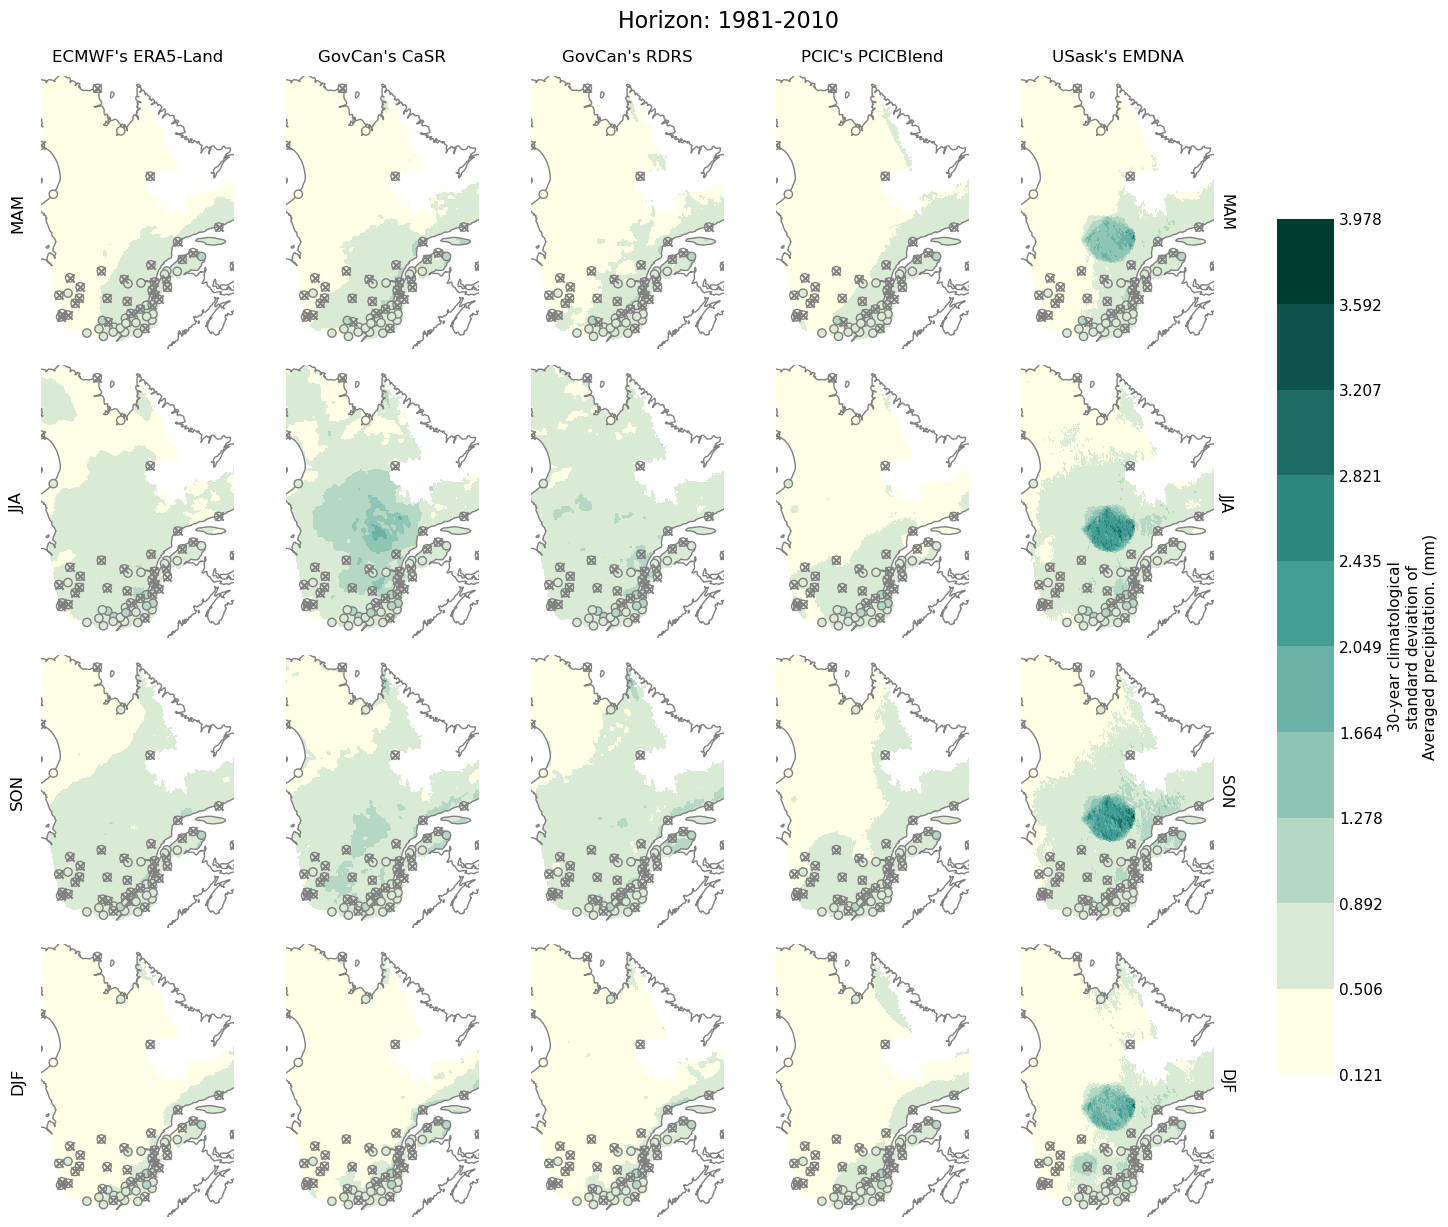

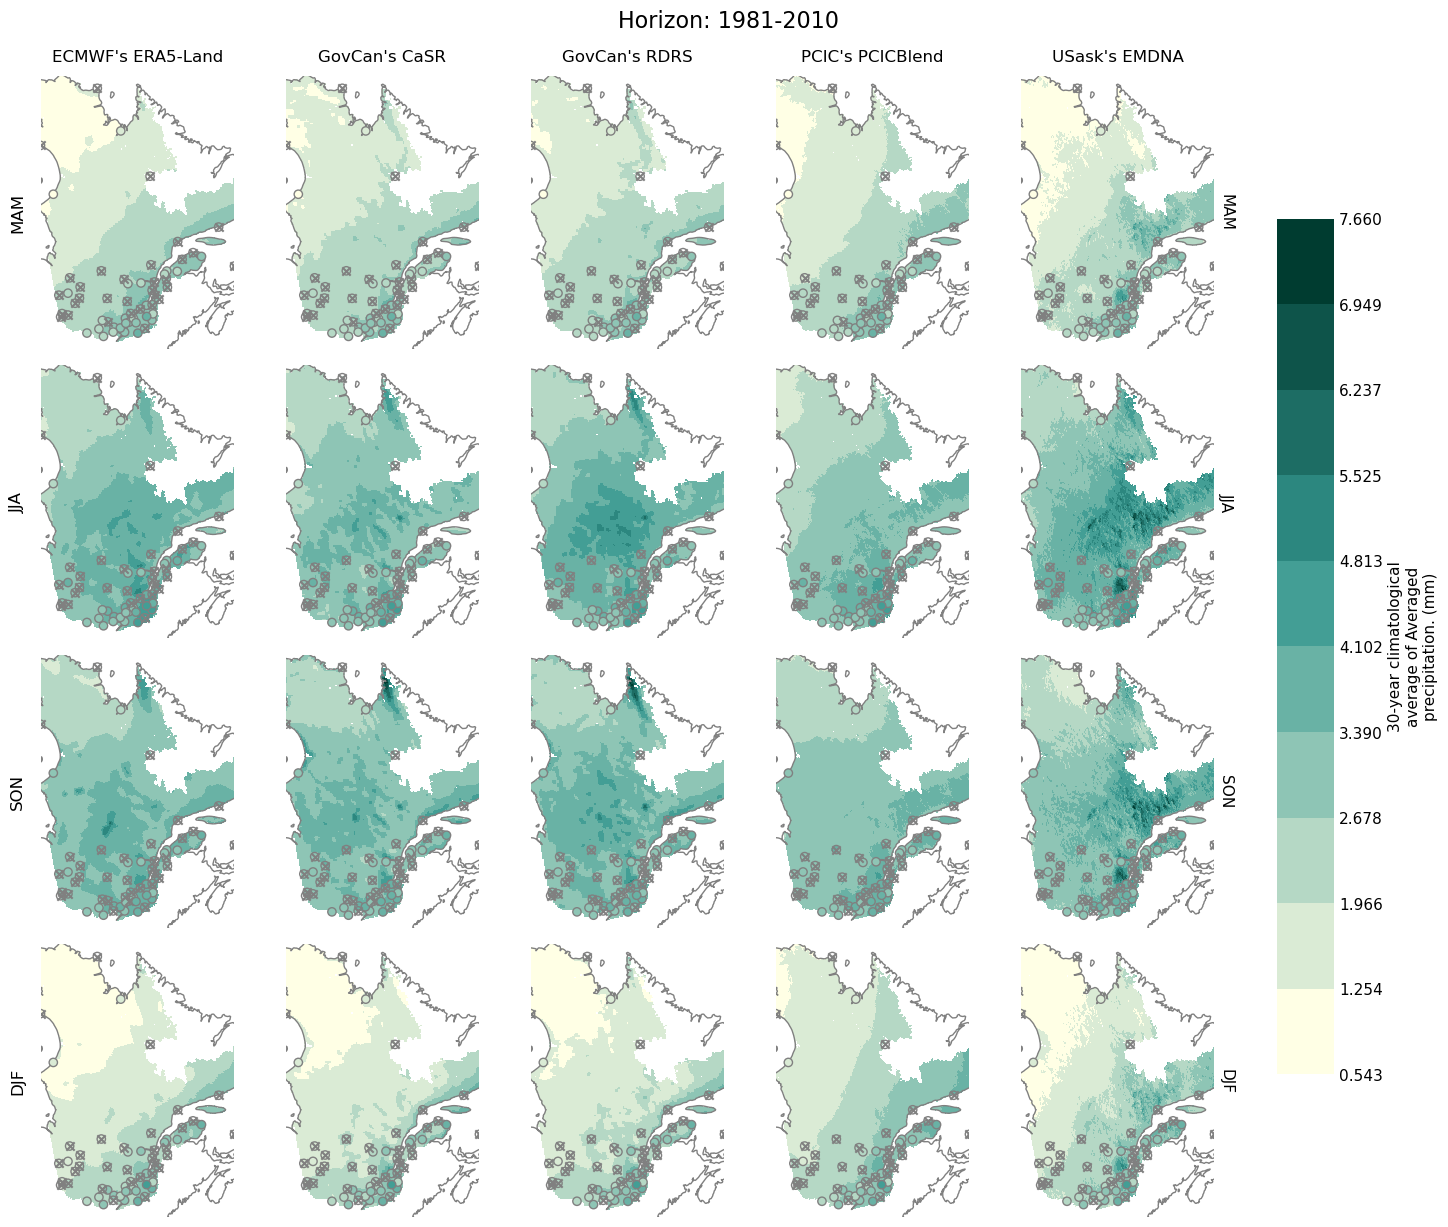

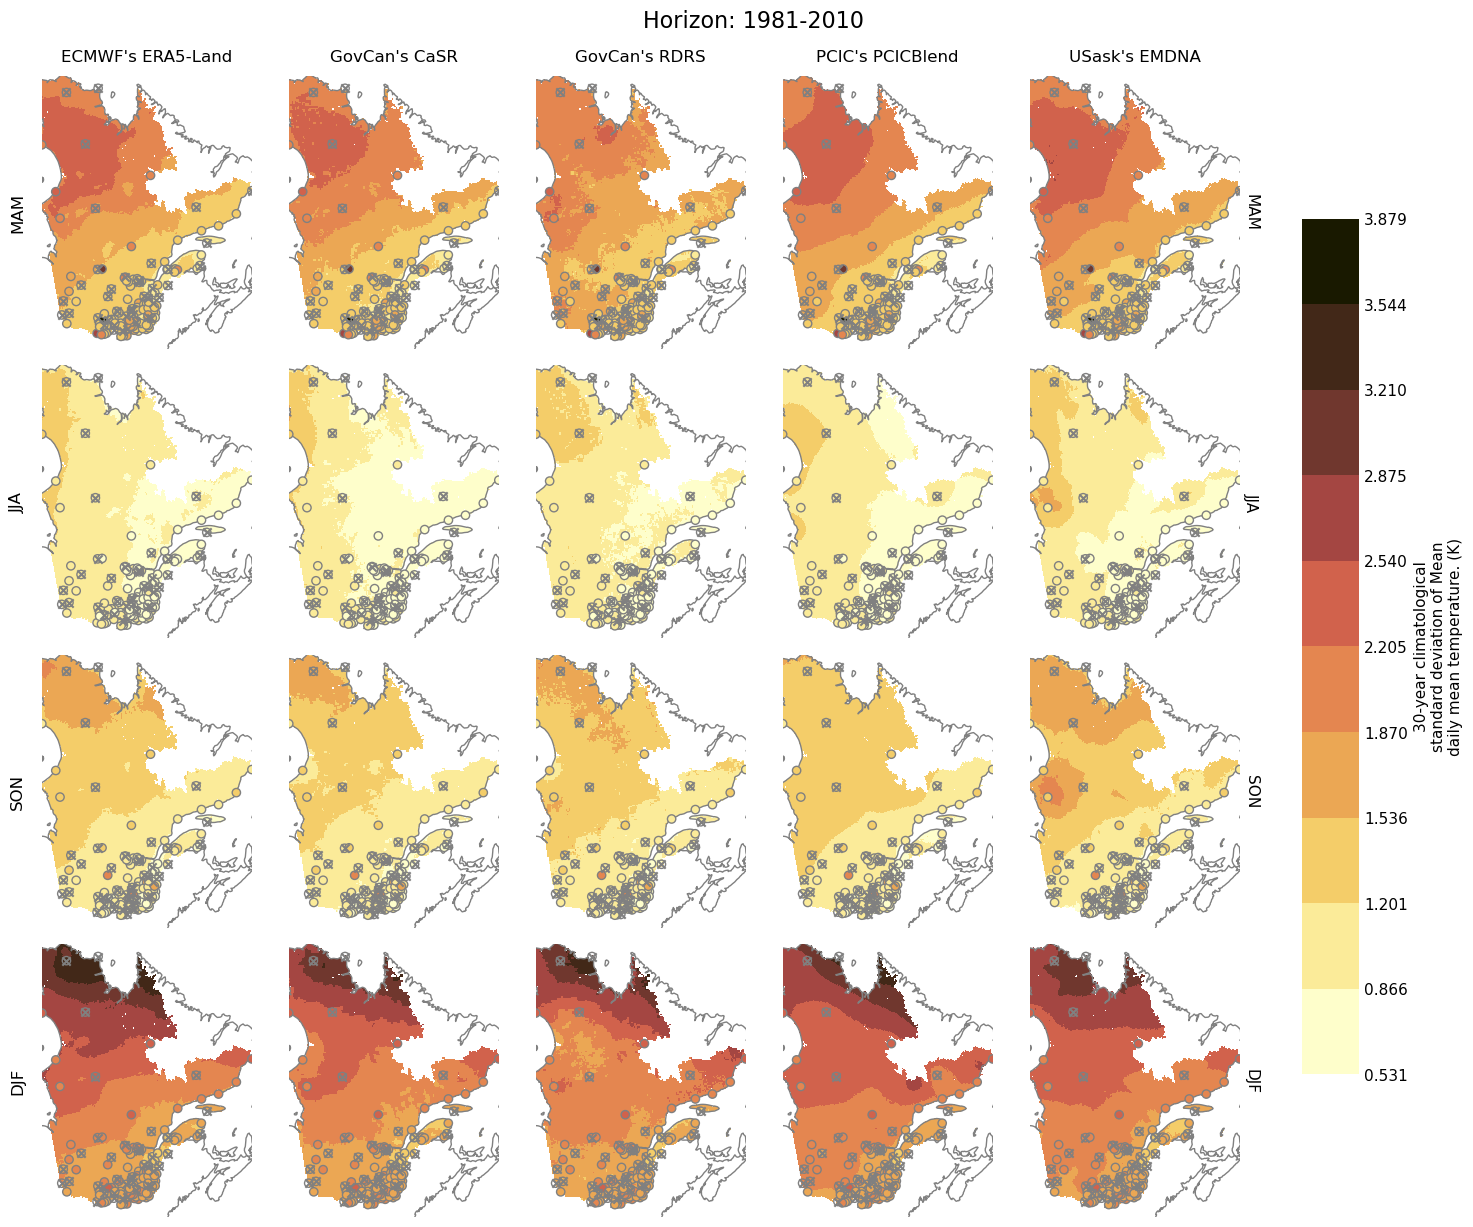

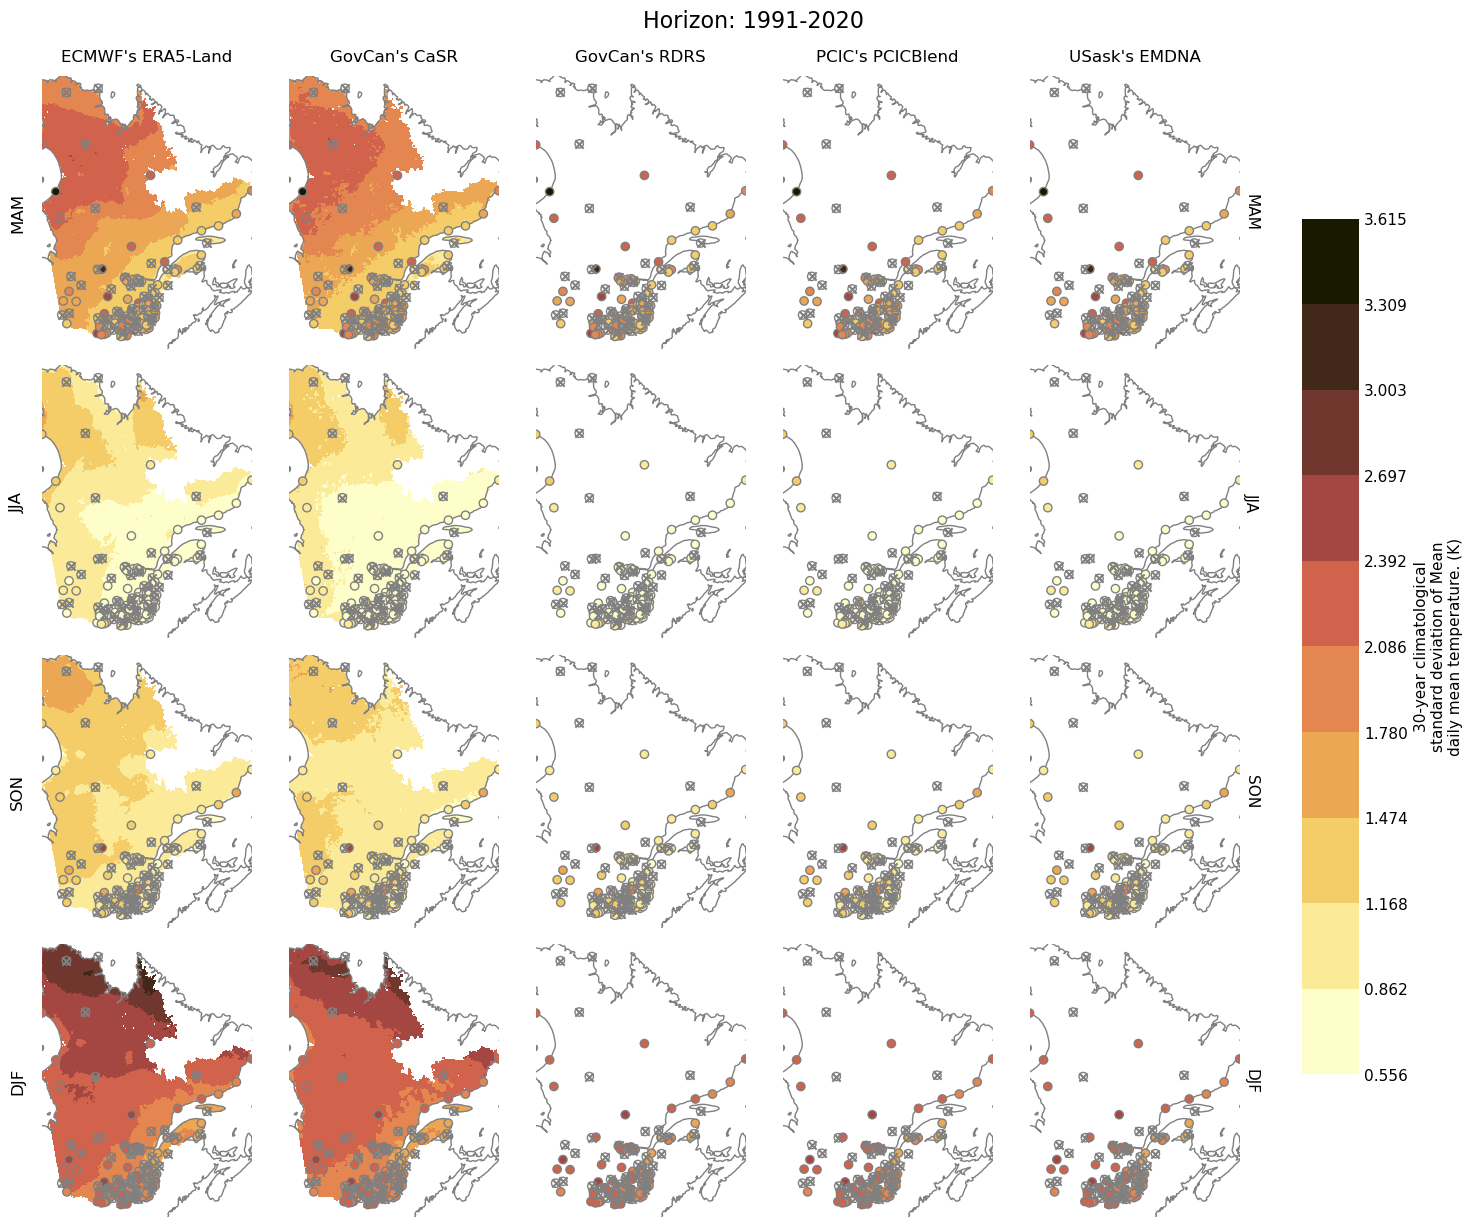

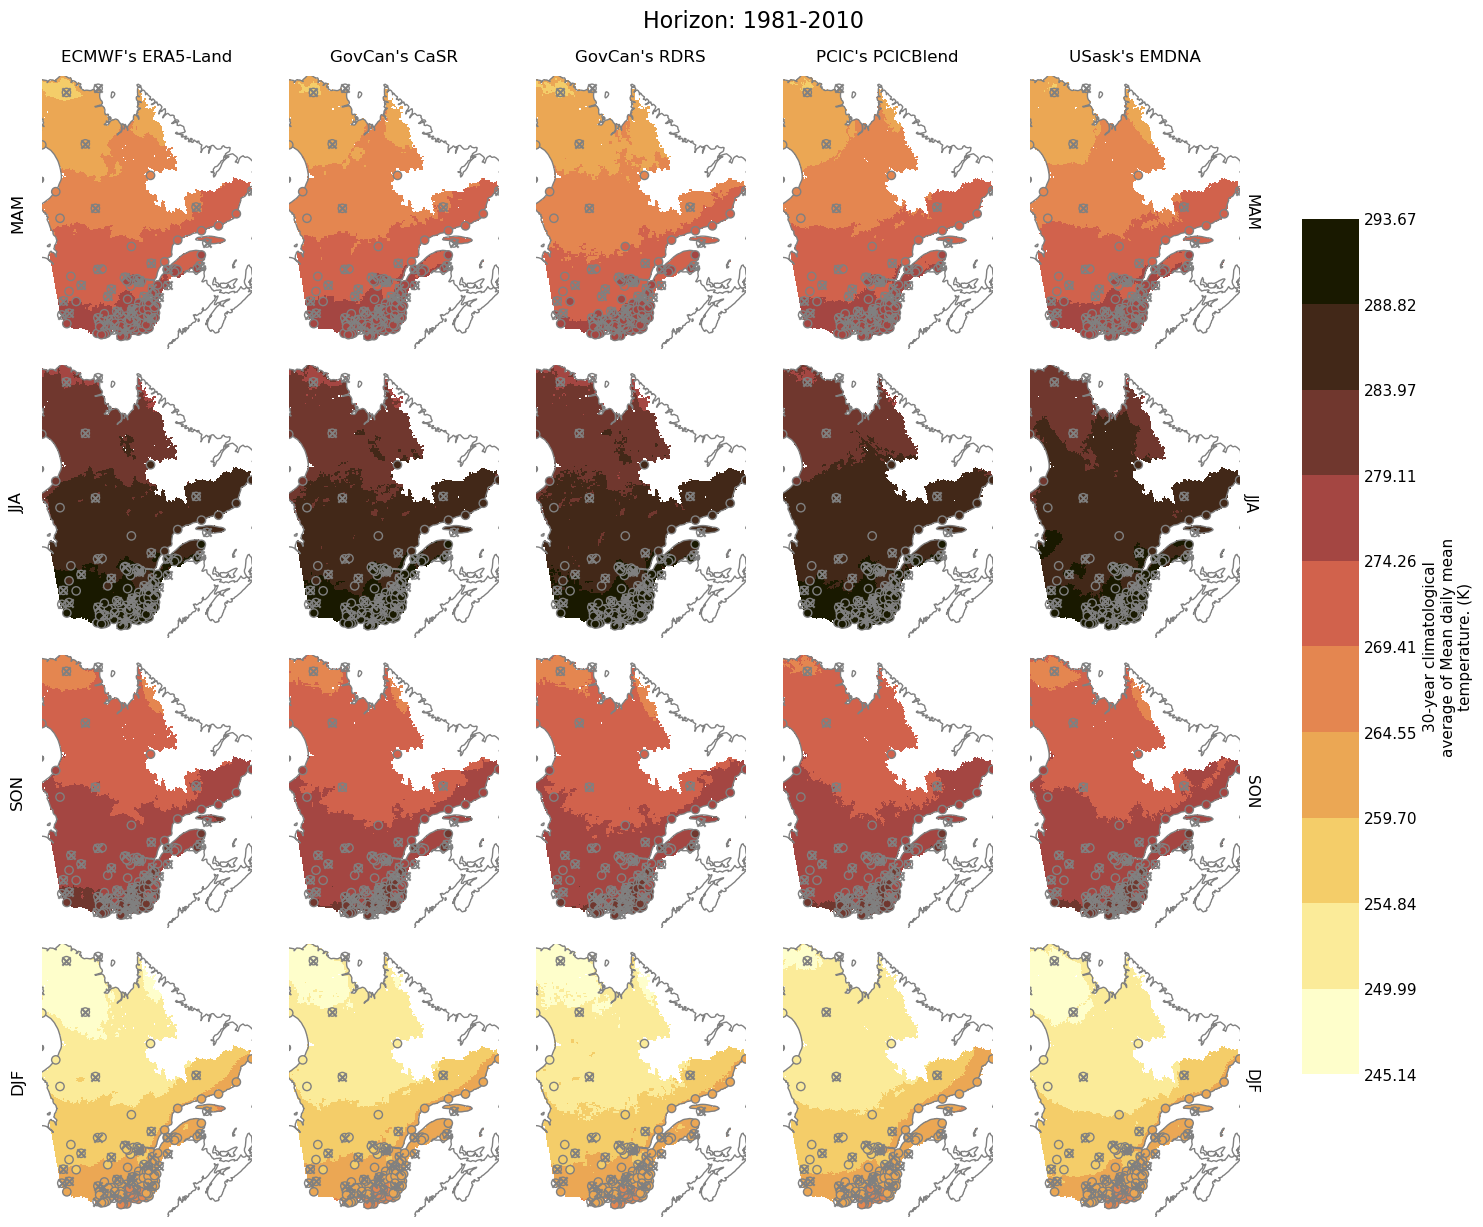

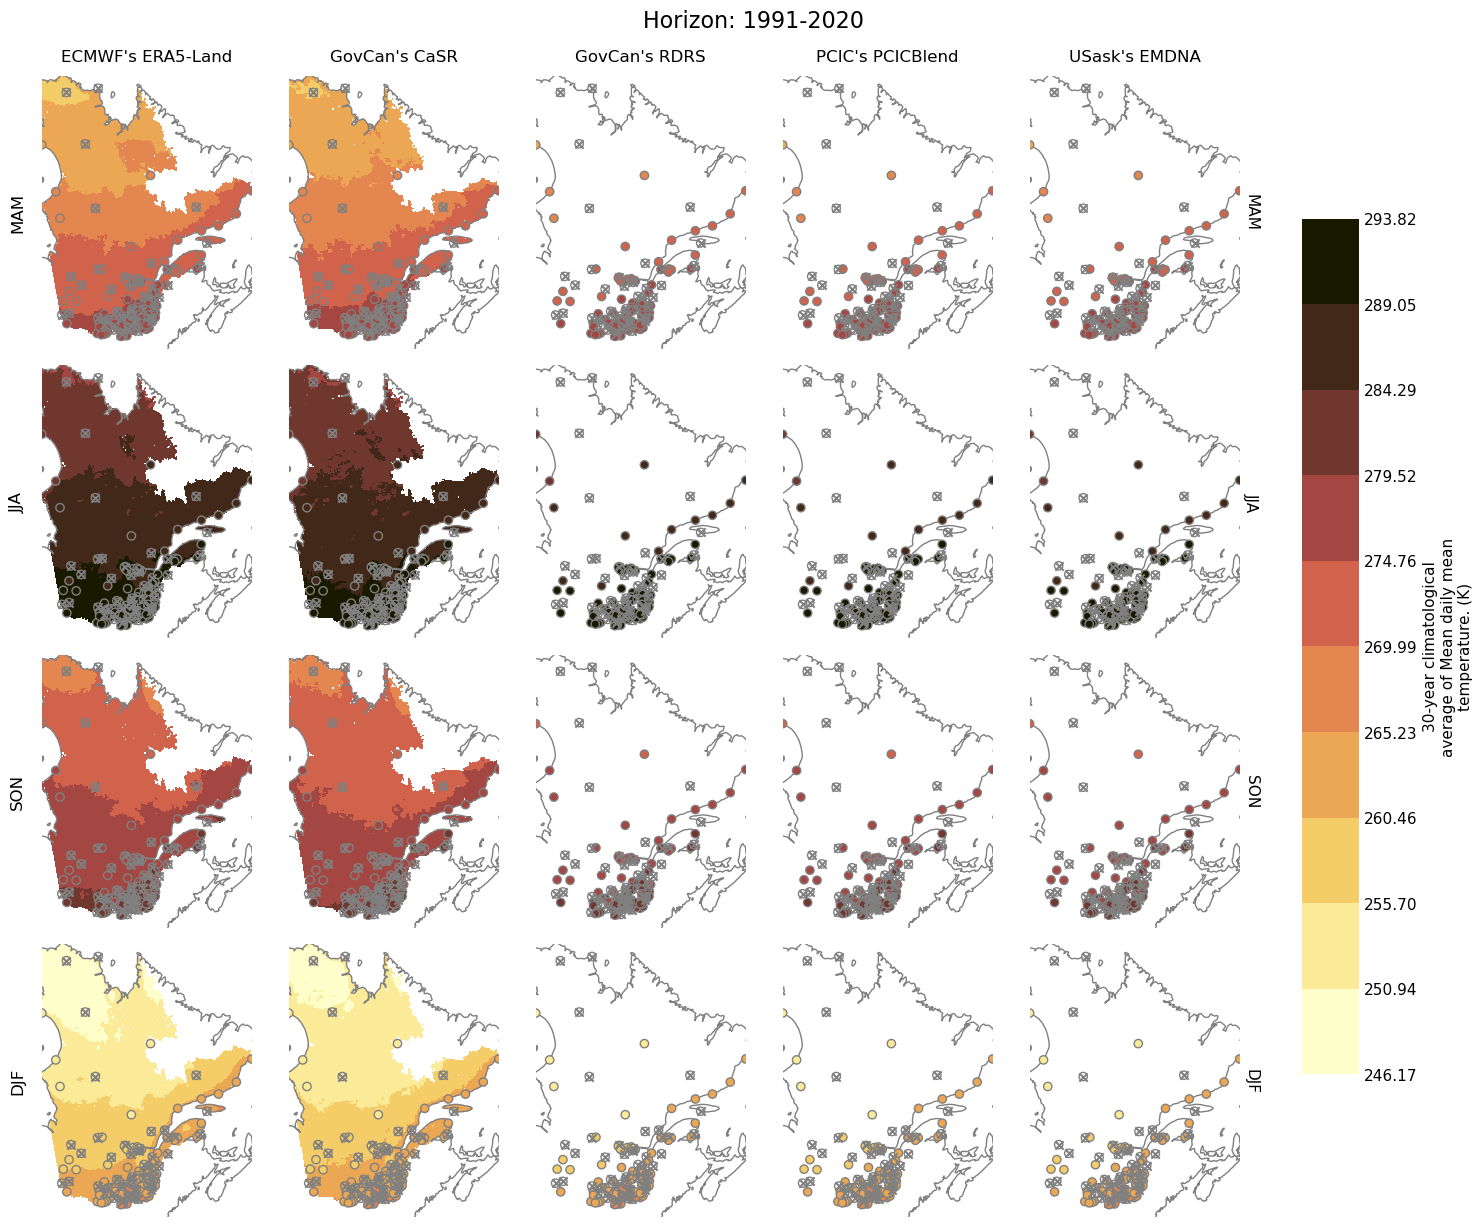

In [90]:
if True:#def plot_climatology_maps():
    pcat_df_clim = pcat_df[pcat_df["processing_level"] == "climatology"]
    variable_groups = pcat_df_clim["variable"].unique()
    variables = set(item for group in variable_groups for item in group)

    for clim_var in variables:
        print(f"Processing variable: {clim_var}")

        dt_obs = pcat.search(
            processing_level="climatology", variable=clim_var, source="AHCCD"
        ).to_dataset()

        dts_rec = pcat.search(
            processing_level="climatology", variable=clim_var, type="reconstruction"
        ).to_dataset_dict()

        obs_horizons = dt_obs.horizon.values

        for horizon in obs_horizons:
            # Skip if observation data is annual (i.e., no 'season' dimension)
            if "season" not in dt_obs[clim_var].dims:
                print(f"	Skipping {clim_var} — Horizon: {horizon} (annual data)")
                continue
            print(f"\tHorizon: {horizon}")

            obs_var = dt_obs[clim_var].sel(horizon=horizon)

            valid_rec_ids = []
            for rec_id, ds in dts_rec.items():
                if clim_var in ds and "horizon" in ds[clim_var].dims and horizon in ds[clim_var].horizon.values:
                    valid_rec_ids.append(rec_id)

            all_rec_ids = sorted(list(dts_rec.keys()))
            obs_var = obs_var.expand_dims(rec_ds=all_rec_ids)

            # determine global vmin/vmax from obs and all matching recs
            vmin = obs_var.min().compute().item()
            vmax = obs_var.max().compute().item()
            for rec_id in valid_rec_ids:
                rec_val = dts_rec[rec_id][clim_var].sel(horizon=horizon)
                vmin = min(vmin, rec_val.min().compute().item())
                vmax = max(vmax, rec_val.max().compute().item())

            norm = colors.Normalize(vmin=vmin, vmax=vmax)
            nlevels = 10
            levels = np.linspace(vmin, vmax, nlevels + 1)

            # === Split obs into valid/NaN ===
            mask_nan = obs_var.isnull().compute()
            mask_valid = ~mask_nan
            obs_nan = obs_var.where(mask_nan, drop=True)
            obs_valid = obs_var.where(mask_valid, drop=True)

            # === BASE PLOT: SCATTERMAP ===
            scatter = fg.scattermap(
                obs_var,
                projection=ccrs.LambertConformal(),
                #fig_kw={"figsize": (4 * len(all_rec_ids), 12)},
                plot_kw={
                    "row": "season",
                    "col": "rec_ds",
                    "norm": norm,
                    "add_colorbar": True,
                    "zorder": 3,
                    "edgecolor": "grey",
                    "cbar_kwargs": {
                        "shrink": 0.75,   # height of colorbar relative to subplot stack
                        "aspect": 15,    # smaller = thinner
                        "pad": 0.04      # space between plots and colorbar
                    }
                },
                levels=levels,
                show_time=False,
                features={"coastline": {"edgecolor": "gray"}},
                enumerate_subplots=True
            )

            # === OVERLAY: GRIDMAP ===
            # Add season labels on the leftmost column
            for i, season in enumerate(obs_var.season.values):
                scatter.axs[i, 0].annotate(
                    str(season),
                    xy=(-0.08, 0.5),
                    xycoords='axes fraction',
                    ha='right',
                    va='center',
                    fontsize=12,
                    rotation=90
                )
                scatter.axs[i, len(all_rec_ids) - 1].set_title("")
                

            for i, season in enumerate(obs_var.season.values):
                for j, rec_id in enumerate(all_rec_ids):
                    ax = scatter.axs[i, j]

                    ds = dts_rec[rec_id]
                    if clim_var not in ds:
                        rec_slice = None
                    elif "season" not in ds[clim_var].dims or season not in ds[clim_var].season.values:
                        rec_slice = None
                    elif "horizon" not in ds[clim_var].dims or horizon not in ds[clim_var].horizon.values:
                        rec_slice = None
                    else:
                        rec_slice = ds[clim_var].sel(horizon=horizon, season=season)

                    if rec_slice is not None:
                        fg.gridmap(
                        rec_slice,
                        ax=ax,
                        transform=ccrs.PlateCarree() if "lat" in rec_slice.dims else None,
                        plot_kw={
                            "norm": norm,
                            "add_colorbar": False,
                            "zorder": 1,
                        },
                        levels=levels,
                        frame=False,
                        show_time=False
                    )
                        
                    mask_subset = mask_nan.sel(season=season, rec_ds=rec_id)

                    if mask_subset.any():
                        lon = obs_var["lon"].where(mask_subset, drop=True)
                        lat = obs_var["lat"].where(mask_subset, drop=True)

                        ax.scatter(
                            lon.values,
                            lat.values,
                            transform=ccrs.PlateCarree(),
                            color="gray",
                            marker="x",
                            zorder=4,
                        )

                    # Set title after gridmap to prevent it from being overwritten
                    ds_meta = dts_rec.get(rec_id)
                    if ds_meta is not None:
                        if i==0: # If this is the first row of the plot
                            inst = ds_meta.attrs.get("cat:institution", "")
                            src = ds_meta.attrs.get("cat:source", "")
                            ax.set_title(f"{inst}'s {src}", fontsize=12)
                        else:
                            ax.set_title(None, fontsize=12)

            scatter.fig.suptitle("Horizon: {}".format(horizon), fontsize=16, y=1.02)
            scatter.cbar.set_ticks(levels)
            scatter.cbar.ax.tick_params(length=0)

            # Remove default facet titles added by xarray (e.g., 'season = DJF\nrec_ds = XYZ')
            for ax in scatter.axs.flat:
                title = ax.get_title()
                if "season =" in title or "rec_ds =" in title:
                    ax.set_title("")


In [75]:
#plot_climatology_maps()
fg_

<xarray.DataArray 'pr_mean_seasonal_clim_std' (rec_ds: 5, season: 4, station: 36)> Size: 6kB
dask.array<where, shape=(5, 4, 36), dtype=float64, chunksize=(5, 4, 29), chunktype=numpy.ndarray>
Coordinates: (12/15)
  * rec_ds        (rec_ds) object 40B 'ECMWF_ERA5-Land_NAM_reconstruction.Que...
    elev          (station) float64 288B 522.0 24.0 388.0 ... 51.0 410.0 122.0
    frommonth     (station) float64 288B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    fromyear      (station) float64 288B 1.949e+03 1.938e+03 ... 1.902e+03
    horizon       <U9 36B '1981-2010'
    lat           (station) float64 288B 54.8 58.47 46.97 ... 45.65 47.92 46.57
    ...            ...
  * station       (station) object 288B '7117825' '7103282' ... '7018000'
    station_name  (station) object 288B 'SCHEFFERVILLE ' ... 'SHAWINIGAN'
    stnid         (station) object 288B '7117825' '7103282' ... '7018000'
    stns_joined   (station) object 288B 'No' 'No' 'No' ... 'Yes' 'Yes' 'No'
    tomonth       (station) float

In [86]:
obs_nan

<xarray.DataArray 'tg_mean_seasonal_clim_mean' (rec_ds: 5, season: 4,
                                                station: 61)> Size: 10kB
dask.array<full_like, shape=(5, 4, 61), dtype=float64, chunksize=(5, 4, 45), chunktype=numpy.ndarray>
Coordinates: (12/18)
  * rec_ds        (rec_ds) object 40B 'ECMWF_ERA5-Land_NAM_reconstruction.Que...
    elev          (station) float64 488B 168.0 244.0 142.0 ... 503.0 30.0 171.0
    frommonth     (station) float64 488B 6.0 12.0 5.0 7.0 ... 10.0 10.0 1.0 4.0
    fromyear      (station) float64 488B 1.976e+03 1.95e+03 ... 2.006e+03
    horizon       <U9 36B '1991-2020'
    joined        (station) object 488B 'n' 'n' 'n' 'y' 'y' ... 'y' 'n' 'y' 'n'
    ...            ...
  * season        (season) <U3 48B 'MAM' 'JJA' 'SON' 'DJF'
  * station       (station) object 488B '7016960' '7017080' ... '7116505'
    station_name  (station) object 488B 'ST CHARLES DE MANDEVILLE' ... 'RIVIE...
    stnid         (station) object 488B '7016960' '7017080' ... '7116505'
    tomonth       (station) float64 488B 12.0 11.0 1.0 12.0 ... 12.0 5.0 12.0
    toyear        (station) float64 488B 2.023e+03 2.018e+03 ... 2.023e+03
Attributes:
    cell_methods:     time: mean over days
    comment:         ECCC Third Generation of Homogenized Temperature Data
    description:     30-year climatological average of Seasonal mean of daily...
    history:         [2025-06-18 15:57:57] 30-year climatological average ove...
    long_name:       30-year climatological average of Mean daily mean temper...
    standard_name:   air_temperature
    units:           K
    units_metadata:  temperature: unknown